# Analysis - exp53

- Consistency check DQN parameters
- This exp is the same as exp45.
- Change opt score calculations to be less dependent on the initial value. 

('score', 'learning_rate', 'epsilon') (0.8610649179784786, 0.001111, 0.05)

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [2]:
path = "/Users/qualia/Code/azad/data/wythoff/exp53/"
exp_53 = load_data(path, run_index=(2, 20))

In [3]:
print(len(exp_53))

19


In [4]:
pprint(exp_53[1].keys())
pprint(exp_53[1]['score'][:20])

dict_keys(['file', 'episode', 'loss', 'score'])
[0.02666666666666667,
 0.022988505747126436,
 0.04040404040404041,
 0.036036036036036036,
 0.03225806451612903,
 0.036231884057971016,
 0.06896551724137931,
 0.08387096774193549,
 0.07784431137724551,
 0.07386363636363637,
 0.08287292817679558,
 0.08376963350785341,
 0.09,
 0.10194174757281553,
 0.11261261261261261,
 0.11555555555555555,
 0.11790393013100436,
 0.1346938775510204,
 0.136,
 0.14453125]


# Plots

Timecourse

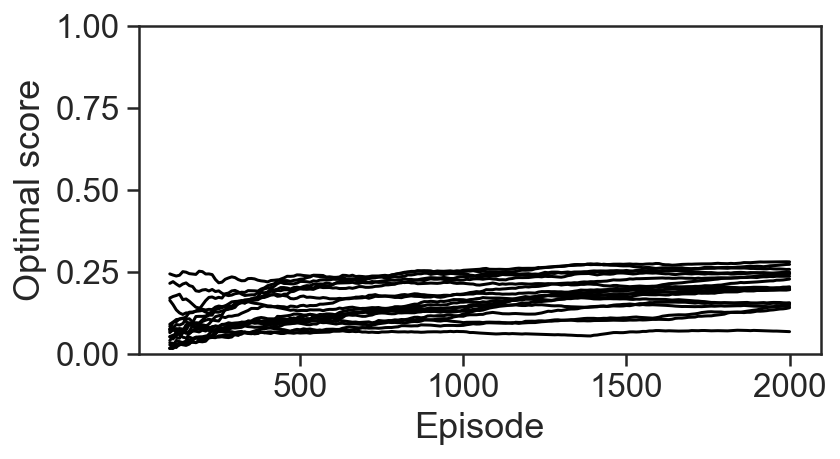

In [5]:
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_53):
    if mon is not None:
        _ = plt.plot(mon['episode'], mon['score'], color='black')
        _ = plt.ylim(0, 1)
_ = plt.ylabel("Optimal score")
_ = plt.tight_layout()                                    
_ = plt.xlabel("Episode")

Histograms of final values

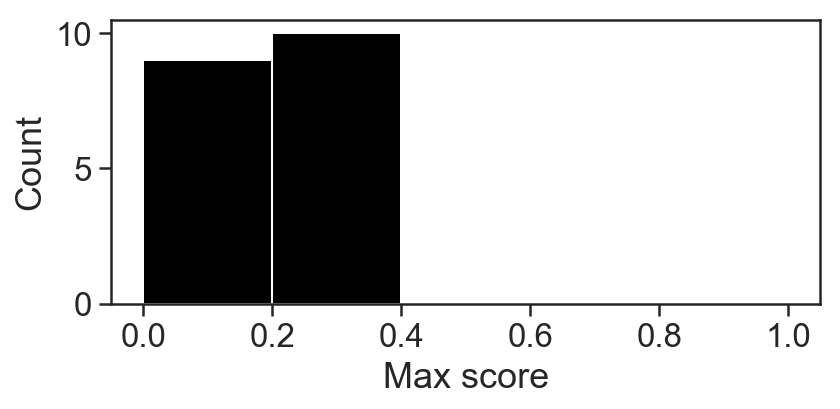

In [6]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_53):
    if mon is not None:
        data.append(np.max(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Max score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()      

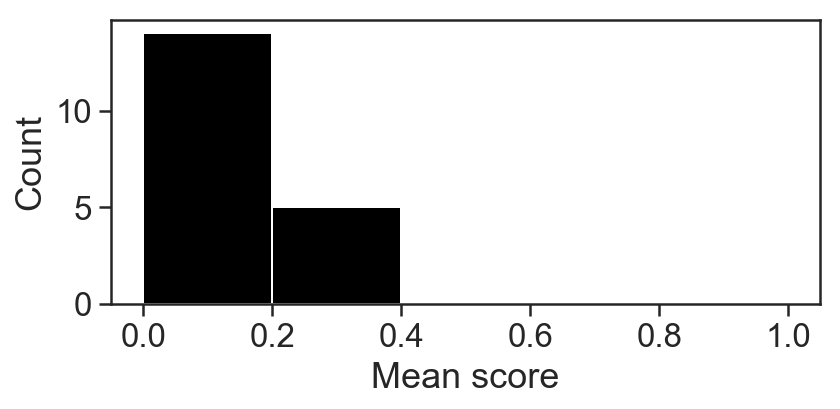

In [7]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_53):
    if mon is not None:
        data.append(np.mean(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Mean score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()                                    